# Mapas del Agua

## Leer datos

In [1]:
import mapper as Mapper
import mapper_addons as addon
import general_codes as gc
import mapper_data as mapdata
import matplotlib.pyplot as plt
import mapper_colors as mapcol
import os
import pandas as pd





output_path = 'output_plots'
sonora = Mapper.new_map(region = 'sonora')
agua_sonora = sonora.copy()
template = addon.call_template('sonora', 'Prueba')
template_agua = template.copy()
template_name = 'Agua Hermosillo'

water_data = 'data\\agua'
water_years = os.listdir(water_data)

files = {}
paths = {}
for wy in water_years:
    p = os.path.join(water_data, wy)
    paths[wy] = p
    files[wy] = os.listdir(p)

wy = water_years[0]
g = files[wy]
f0 = os.path.join(paths[wy],g[0])

df = pd.read_csv(f0, index_col=0)
df.set_index(df.columns[0], drop=True, inplace=True)
agua_sonora = agua_sonora.join(df)

## Un mapa

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


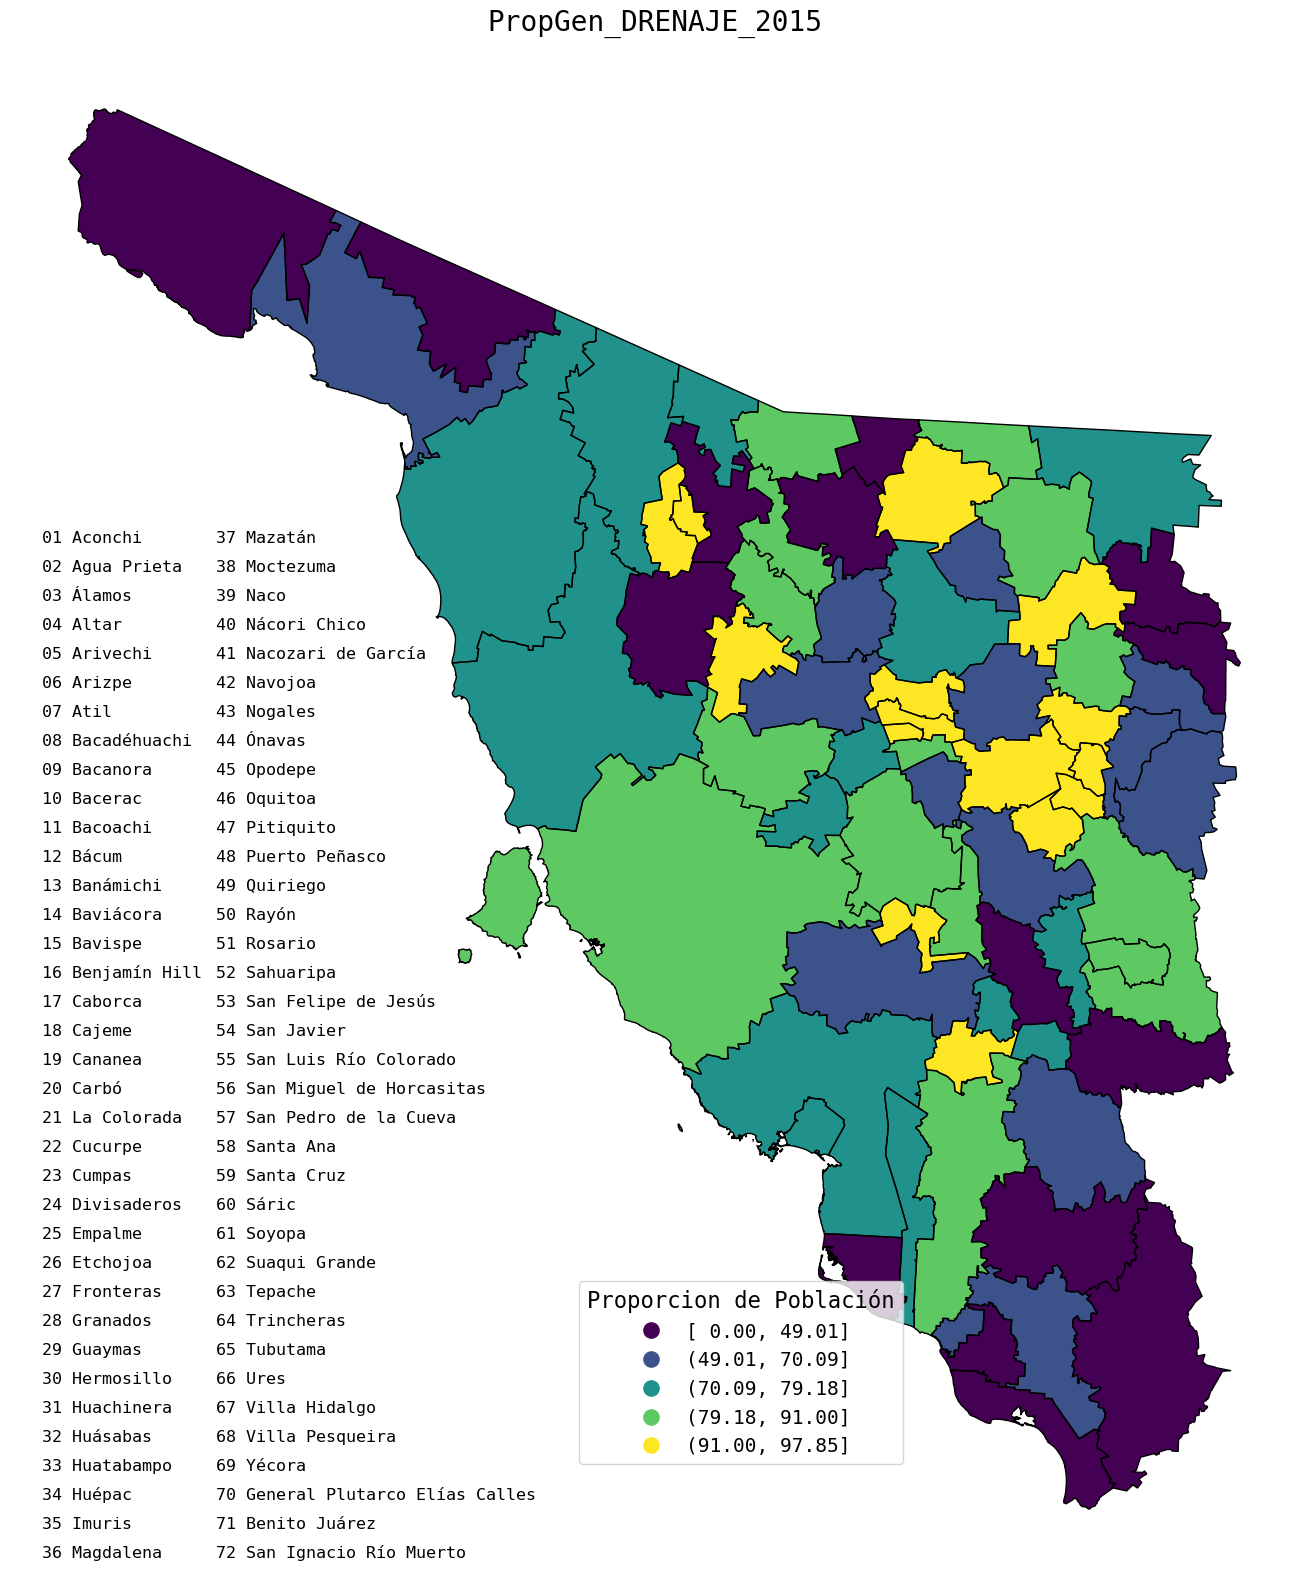

In [7]:

fig, ax = plt.subplots(figsize = (20,20))
agua_sonora.plot(column = '1', ax = ax, scheme = 'quantiles', legend=True, legend_kwds = {
    # 'loc' : 'lower left',
    'title': 'Proporcion de Población',
    'title_fontsize': 16,
    'bbox_to_anchor' : (0.7,0.2),
    'markerscale' : 1.2,
    'fontsize' : 14,
    'interval': True
})
ax.set_title(g[0][:-4], fontsize = 20)
agua_sonora.boundary.plot(color = 'black', lw = 1, ax = ax)
ax.set_axis_off()
mx = 1.25e6
my = 2.1e6
addon.print_regions(agua_sonora.index, [mx, my], ax)

# Todos los mapas.

In [3]:
mun_x = 1.25e6
mun_y = 2.1e6
sep_x = 0.9e5
sep_y = 0.15e5
n_cols = 2

def agua2():
    for wy in water_years:
        for f in files[wy]:
            agua_sonora = sonora.copy()
            f0 = os.path.join(paths[wy],f)
            df = pd.read_csv(f0, index_col=0)
            df.set_index(df.columns[0], drop=True, inplace=True)
            fig, ax = plt.subplots(figsize = (20,20))
            agua_sonora = agua_sonora.join(df)
            agua_data_plots = mapdata.set_data(agua_sonora)
            for n_a, adp in enumerate(agua_data_plots):
                agua_sonora.plot(adp, ax = ax, scheme = 'quantiles',k = 4, legend=True, legend_kwds = {
                    # 'loc' : 'lower left',
                    'title': 'Proporcion de Población',
                    'title_fontsize': 16,
                    'bbox_to_anchor' : (0.6,0.2),
                    'markerscale' : 1.2,
                    'fontsize' : 14,
                    'interval': True
                })
                ax.set_title(f[:-4], fontsize = 20)
                agua_sonora.boundary.plot(color = 'black', lw = 1, ax = ax)
                ax.set_axis_off()
                block = len(agua_sonora.index) // n_cols 
                for k,mun in enumerate(agua_sonora.index):
                    cve = f'0{k+1}' if k+1 <10 else f'{k+1}'
                    text = f'{cve} {mun}'
                    ax.annotate(text=text, xy = (mun_x, mun_y), xytext= (mun_x + k // block * sep_x ,mun_y - k % block *sep_y),
                                fontsize = 12)
                plt.savefig(f'output_plots\\agua\\{f[:-4]}_{n_a}.png')


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


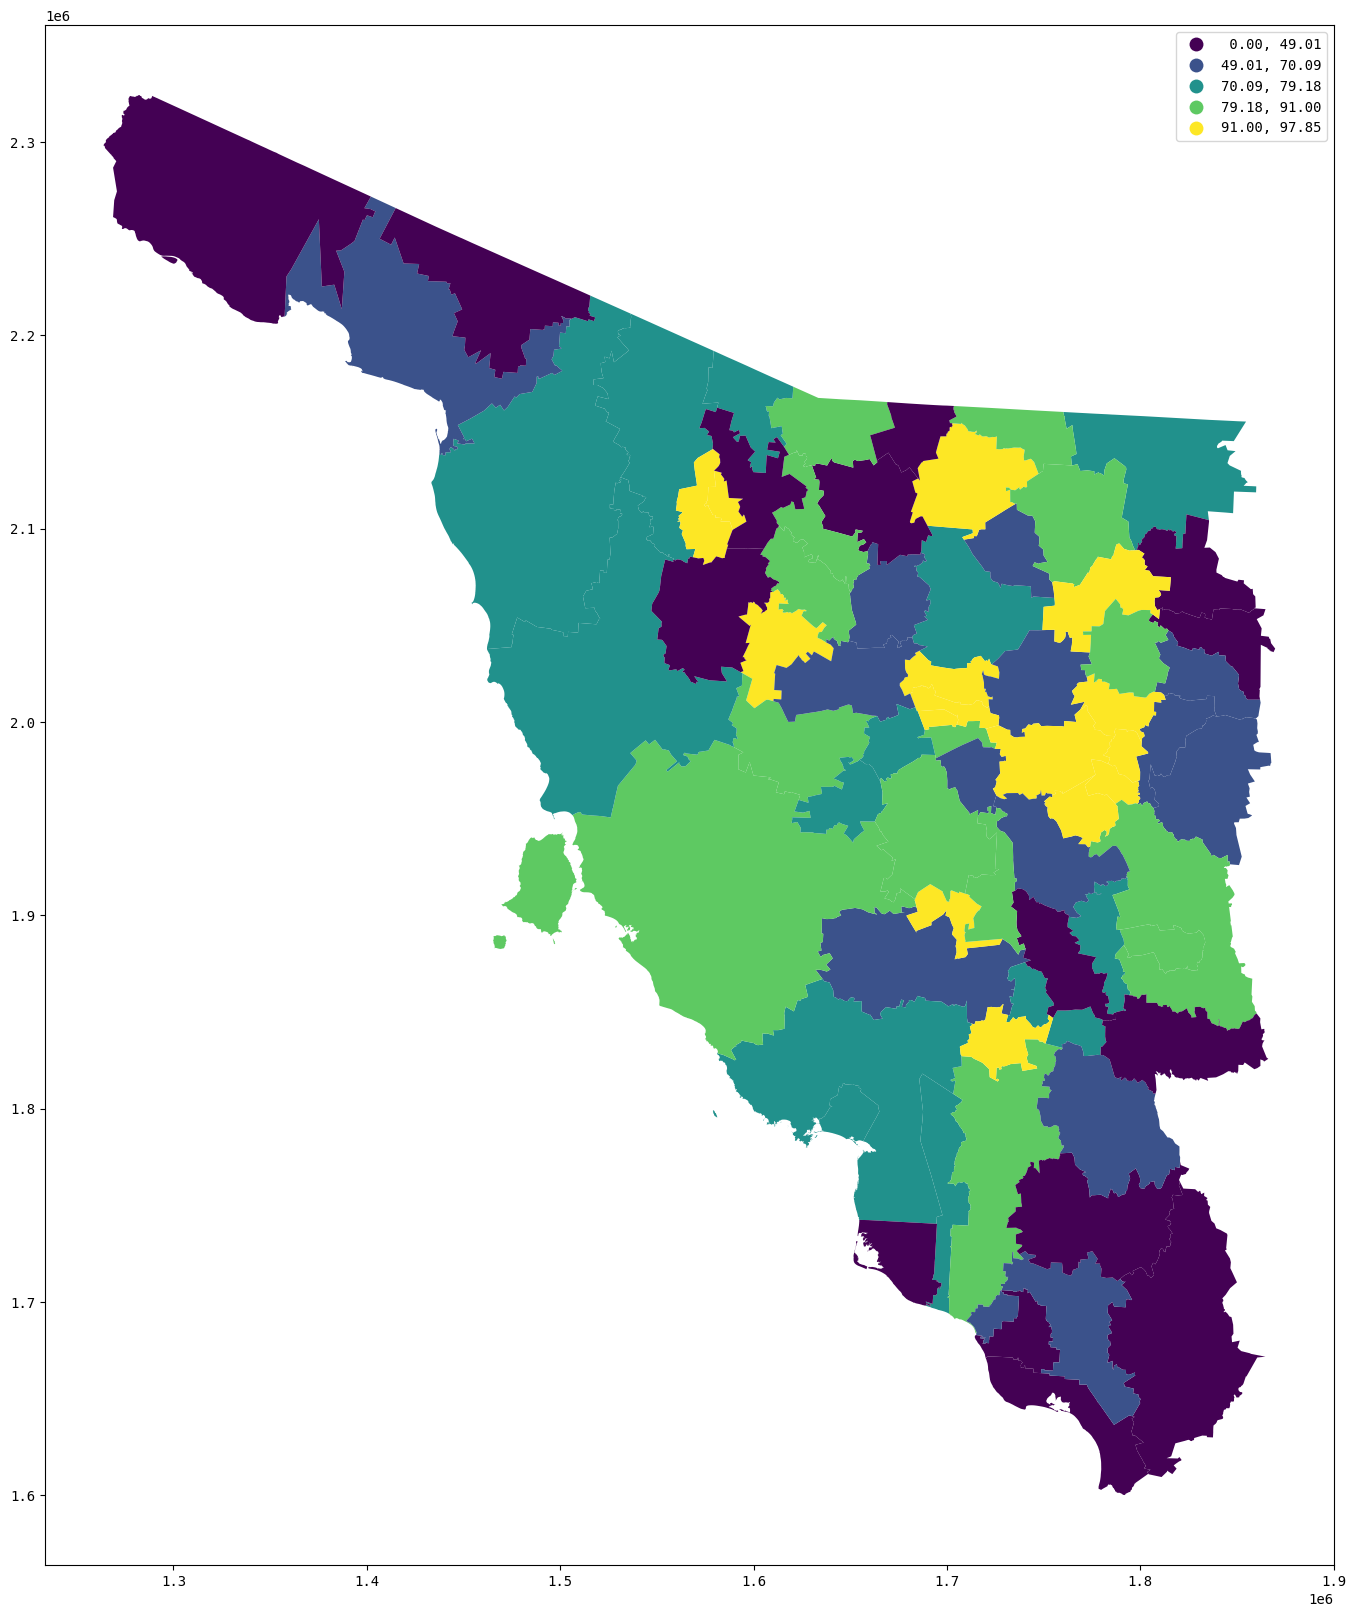

In [4]:
fis, axs = plt.subplots(figsize = (20,20))
agua_sonora.plot('1', scheme = 'quantiles', legend = True, ax = axs)


def agua():
    for wy in water_years:
        for f in files[wy]:
            agua_sonora = sonora.copy()
            f0 = os.path.join(paths[wy],f)
            df = pd.read_csv(f0, index_col=0)
            df.set_index(df.columns[0], drop=True, inplace=True)
            fig, ax = plt.subplots(figsize = (20,20))
            agua_sonora = agua_sonora.join(df)
            agua_data_plots = gc.set_data(agua_sonora)
            for n_a, adp in enumerate(agua_data_plots):
                agua_sonora.plot(adp, ax = ax, scheme = 'quantiles', colormap = 'viridis',legend=True, legend_kwds = {
                    # 'loc' : 'lower left',
                    'title': 'Proporcion de Población',
                    'title_fontsize': 16,
                    'bbox_to_anchor' : (0.6,0.2),
                    'markerscale' : 1.2,
                    'fontsize' : 14,
                    'interval': True
                })
                ax.set_title(f[:-4], fontsize = 20)
                agua_sonora.boundary.plot(color = 'black', lw = 1, ax = ax)
                ax.set_axis_off()
                mun_x = 1.25e6
                mun_y = 2.1e6
                sep_x = 0.9e5
                sep_y = 0.15e5
                n_cols = 2
                block = len(agua_sonora.index) // n_cols 
                for k,mun in enumerate(agua_sonora.index):
                    cve = f'0{k+1}' if k+1<10 else f'{k+1}'
                    text = f'{cve} {mun}'
                    ax.annotate(text=text, xy = (mun_x, mun_y), xytext= (mun_x + k // block * sep_x ,mun_y - k % block *sep_y),
                                fontsize = 12)
                plt.savefig(f'output_plots\\agua\\{f[:-4]}_{n_a}.png')
        


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


Text(0.5, 1.0, 'Mapa de Sonora')

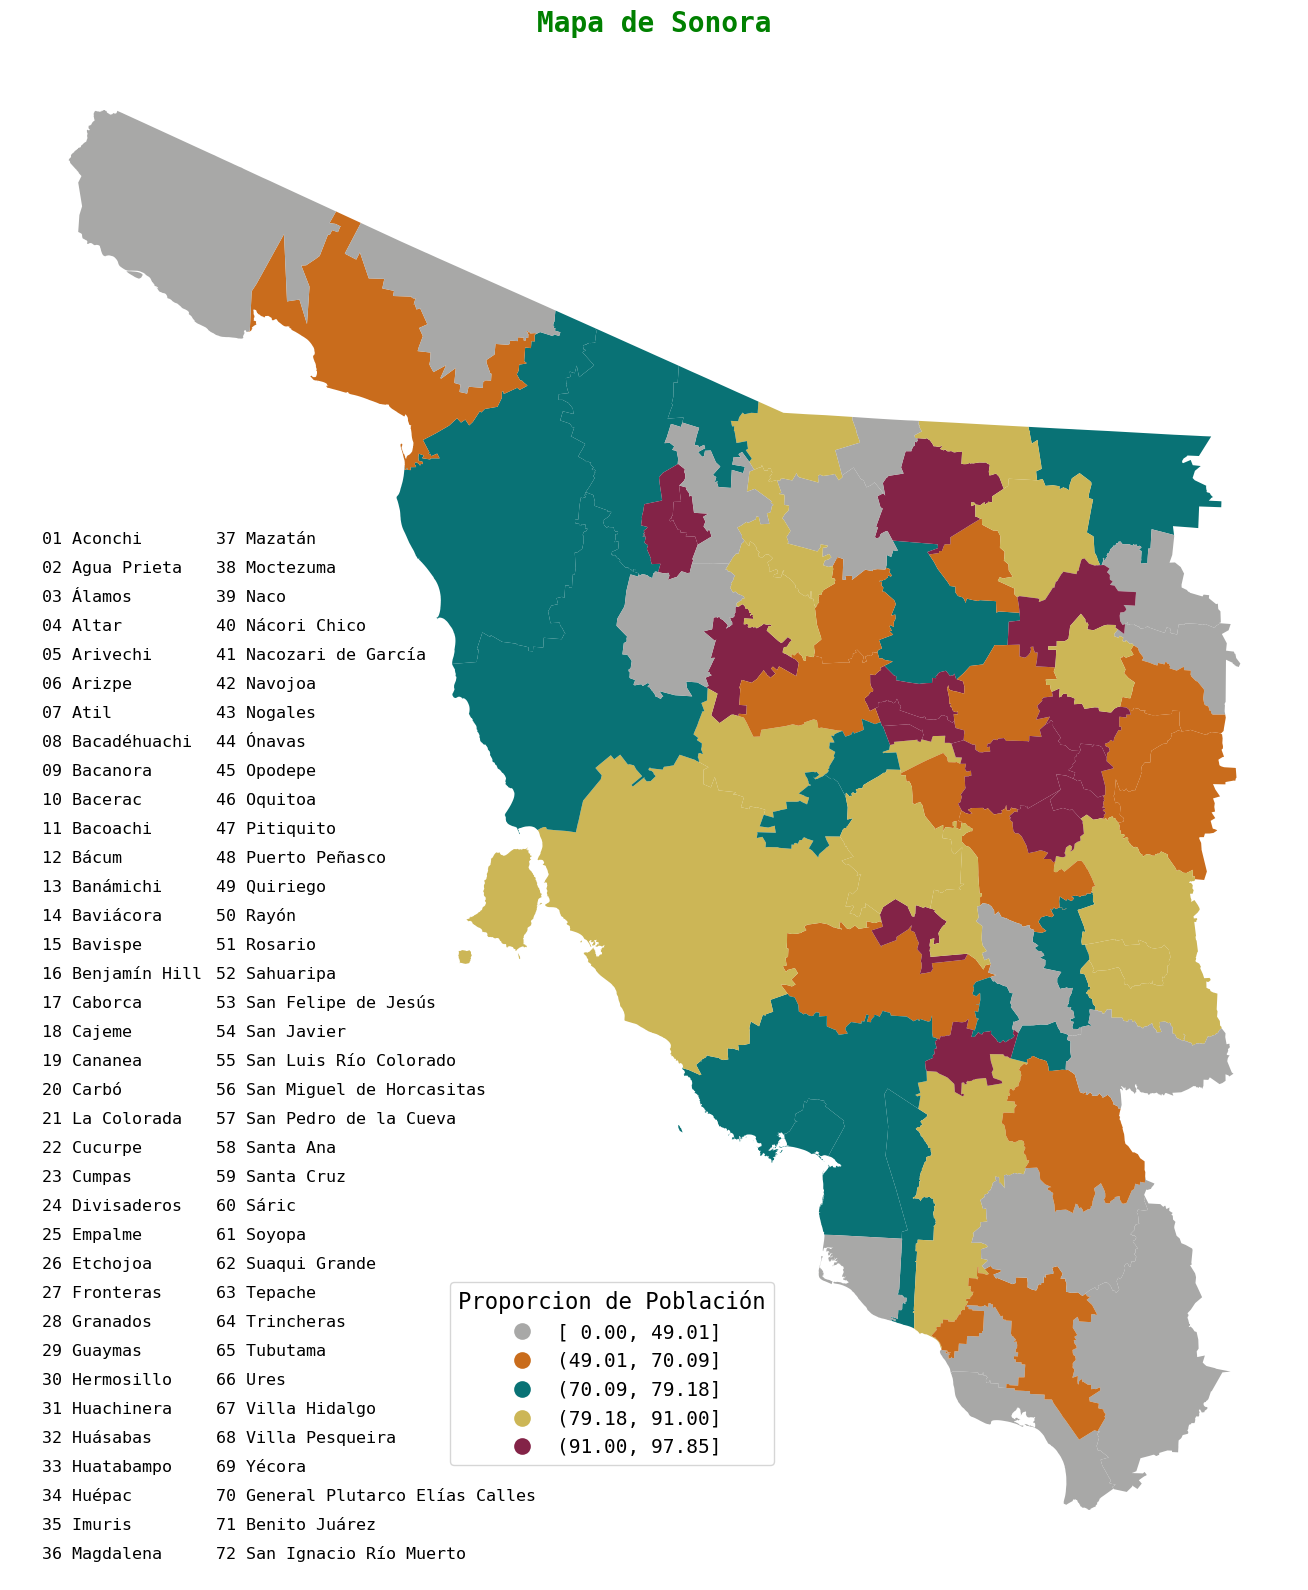

In [5]:

import mapper_gallery as mgal

colors = {0:mgal.isaf_plata,
          1:mgal.isaf_naranja,
          2:mgal.isaf_verde,
          3:mgal.isaf_dorado,
          4:mgal.isaf_guinda}

mplcol = mapcol.custom_cmap(colors)

collll ='1'
fis, axs = plt.subplots(figsize = (20,20))
agua_sonora.plot(collll, scheme = 'quantiles', cmap = mplcol, legend = True, ax =axs, legend_kwds = {
                # 'loc' : 'lower left',
                'title': 'Proporcion de Población',
                'title_fontsize': 16,
                'bbox_to_anchor' : (0.6,0.2),
                'markerscale' : 1.2,
                'fontsize' : 14,
                'interval': True
            })
mx = 1.25e6
my = 2.1e6
addon.print_regions(agua_sonora.index, [mx, my], axs)
axs.set_axis_off()
axs.set_title('Mapa de Sonora', fontsize = 20, color = 'green', weight = 'bold')


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


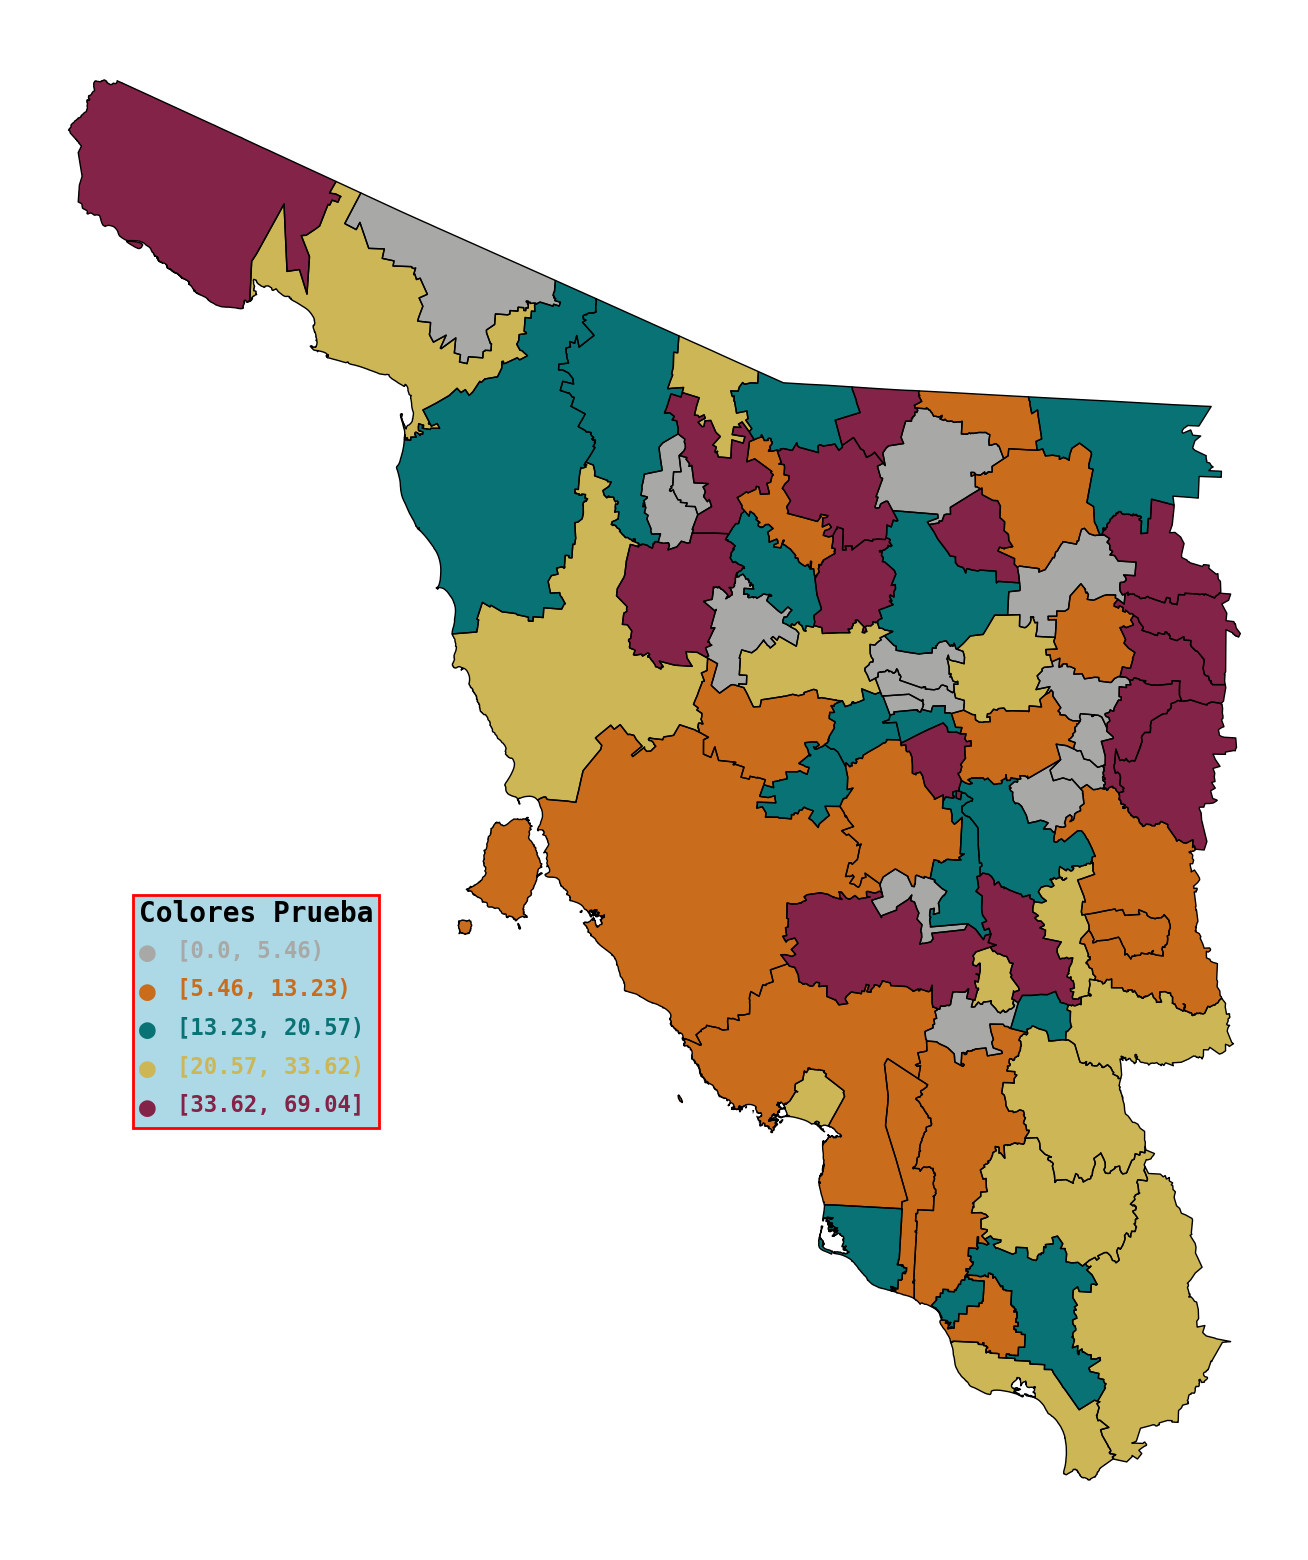

In [6]:
fig1, axs = plt.subplots(figsize = (20,20))
addon.legend_by_data(agua_sonora, '2', axs)
agua_sonora.boundary.plot(lw = 1, color = 'black', ax = axs)
axs.set_axis_off()
